<a href="https://colab.research.google.com/github/gagan-iitb/DS-503/blob/main/Handouts/Week2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


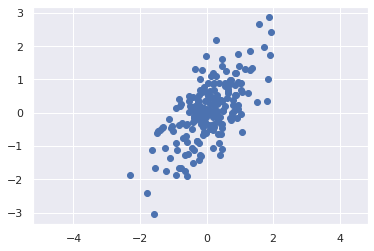

In [6]:
# Generating points with correlation between them
rng = np.random.RandomState(10)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.components_)

[[-0.60247767 -0.79813574]
 [ 0.79813574 -0.60247767]]


In [9]:
print(pca.explained_variance_)

[1.16916171 0.22345098]


In [14]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='r')
  ax.annotate('', v1, v0, arrowprops=arrowprops)


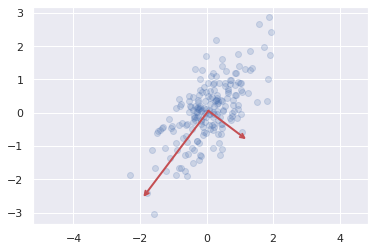

In [15]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');  

In [16]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


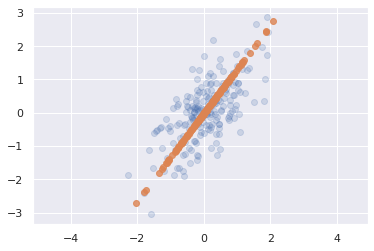

In [17]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# PCA for Handwritten digits

In [27]:
from keras.datasets import mnist

In [28]:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/

(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


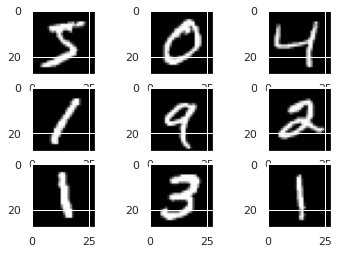

In [29]:
from matplotlib import pyplot
for i in range(3):
  for j in range(3):  
    pyplot.subplot2grid((3,3),(i,j))
    pyplot.imshow(train_X[3*i+j], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [40]:
type(train_X)
train_X.shape
train_y.shape

(60000,)

In [37]:
digits=np.reshape(train_X, (60000,784))

In [38]:
pca = PCA(2) # project from 784 to 2 dimensions
projected = pca.fit_transform(digits)
print(digits.data.shape)
print(projected.shape)

(60000, 784)
(60000, 2)


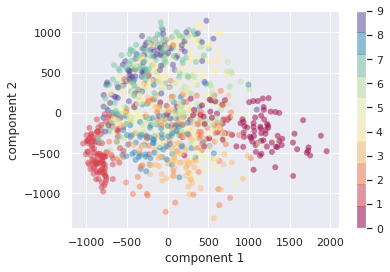

In [45]:
plt.scatter(projected[1:1000, 0], projected[1:1000, 1],
            c=train_y[1:1000], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

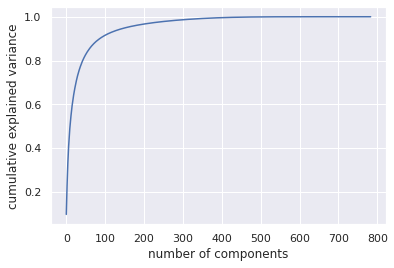

In [46]:
# Deciding how many components we need 
pca = PCA().fit(digits)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [50]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(28, 28),
    cmap='binary', interpolation='nearest',clim=(0, 16))

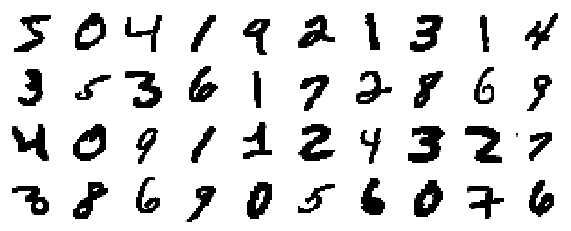

In [51]:
plot_digits(digits)

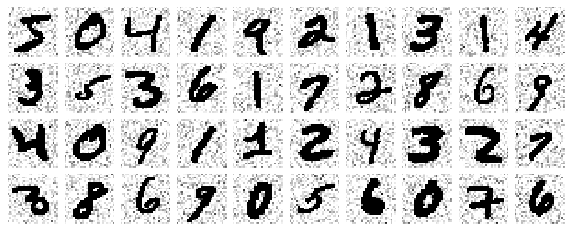

In [52]:
#Adding Noise to data 
np.random.seed(42)
noisy = np.random.normal(digits, 4)
plot_digits(noisy)

In [57]:
pca = PCA(0.9).fit(noisy)
pca.n_components_

90

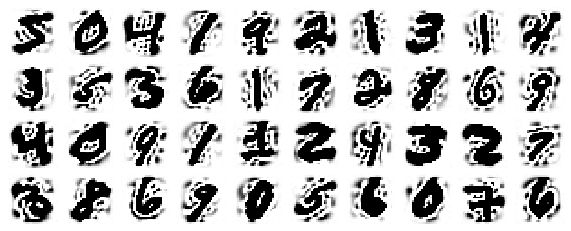

In [58]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# Eigenfaces

In [59]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [67]:
!pip install scipy

In [69]:
from sklearn.decomposition import PCA as RandomizedPCA
# reducing from 3000 dimensions to 150
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

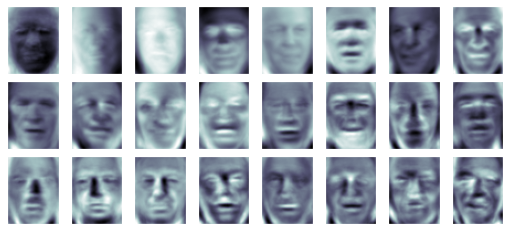

In [71]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
            subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

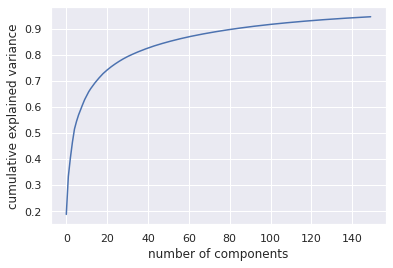

In [72]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [73]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

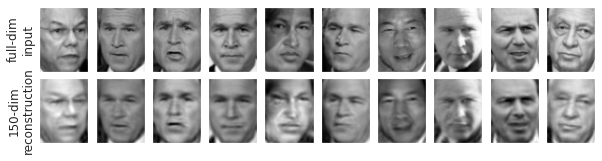

In [74]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
          subplot_kw={'xticks':[], 'yticks':[]},
          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');